In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'




In [2]:


xls1 = pd.ExcelFile('C://Users//Aniruddha//OneDrive - Infiniti Research//Documents//New folder//bookings.xlsx')
df1 = pd.read_excel(xls1, '2016-2017 Bookings')
df1=df1.sort_values(by='Day of StayDate')
df1 = df1.reset_index(drop=True)
df1.columns
df1.rename(columns={'Hotel Code':'Mnemonic Code', 'Day of Conf Date':'Day of Confirmation Date','Confirm Number':'Confirmation Number','Room Type Code':'Room Type Booked','Status':'Booking Status','Day of StayDate':'Day of Stay Date','Rate':'RATE'}, inplace=True)
df1=df1[['Mnemonic Code', 'Day of Confirmation Date', 'Confirmation Number',
       'Room Type Booked', 'Booking Status', 'Day of Stay Date', 'RATE']]
df1['Mnemonic Code'] = df1['Mnemonic Code'].replace({'SUR':'MIASS', 'LWP':'LAXWP','INK':'NYCIK','SFD':'SFODR'})






In [3]:

xls2 = pd.ExcelFile('C://Users//Aniruddha//OneDrive - Infiniti Research//Desktop//A//2019.xlsx')
df2 = pd.read_excel(xls2, '2018-2019 Bookings')
df2=df2.sort_values(by='Day of Stay Date')
df2 = df2.reset_index(drop=True)
df2.columns





Index(['Mnemonic Code', 'Day of Confirmation Date', 'Confirmation Number',
       'Room Type Booked', 'Booking Status', 'Day of Stay Date', 'RATE'],
      dtype='object')

In [4]:
df1=df1.loc[df1['RATE'] >= 50]
df1 = df1.reset_index(drop=True)

df2=df2.loc[df2['RATE'] >= 50]
df2 = df2.reset_index(drop=True)





In [5]:
#2018-2019
df2.columns
df2=df2.drop(['Day of Stay Date','Room Type Booked'], axis=1)
df2_V1=df2.drop_duplicates()
df2_V1['Bookings']=df2_V1.groupby(['Mnemonic Code','Day of Confirmation Date','Booking Status'])['Confirmation Number'].transform('count')
df3=df2_V1[['Mnemonic Code', 'Day of Confirmation Date','Bookings','Booking Status']].drop_duplicates()
list_of_values = ['MIASS','LAXWP','NYCIK','SFODR']
y = df3[df3['Mnemonic Code'].isin(list_of_values)]

z = df3[~df3['Mnemonic Code'].isin(list_of_values)]

y['Week_Number'] = y['Day of Confirmation Date'].dt.week
y['year'] =  y['Day of Confirmation Date'].dt.year

#Without pilot hotels
z['Week_Number'] = z['Day of Confirmation Date'].dt.week
z['year'] =  z['Day of Confirmation Date'].dt.year



y.to_csv('y_v1.csv')





In [6]:
#2017-2018
df1=df1.drop(['Day of Stay Date','Room Type Booked'], axis=1)
df1_V1=df1.drop_duplicates()
df1_V1['Bookings']=df1_V1.groupby(['Mnemonic Code','Day of Confirmation Date','Booking Status'])['Confirmation Number'].transform('count')
df4=df1_V1[['Mnemonic Code', 'Day of Confirmation Date','Bookings','Booking Status']].drop_duplicates()
list_of_values = ['MIASS','LAXWP','NYCIK','SFODR']
y1 = df4[df4['Mnemonic Code'].isin(list_of_values)]

z1 = df4[~df4['Mnemonic Code'].isin(list_of_values)]


y1['Week_Number'] = y1['Day of Confirmation Date'].dt.week
y1['year'] =  y1['Day of Confirmation Date'].dt.year

#Without pilot hotels
z1['Week_Number'] = z1['Day of Confirmation Date'].dt.week
z1['year'] =  z1['Day of Confirmation Date'].dt.year

y1.to_csv('y1_v1.csv')



In [48]:
#merging 
FRAMES=[y,y1]
result_pilot=pd.concat(FRAMES)
result_pilot.to_csv('result_pilot.csv')

FRAMES1=[z,z1]
result_nopilot=pd.concat(FRAMES1)
result_nopilot.to_csv('result_nopilot.csv')

In [49]:
result_nopilot['Mnemonic Code'] = result_nopilot['Mnemonic Code'].replace({'VRB':'MIAVB', 'EPC':'MIAEP','ANG':'MIAAG','EVT':'NYCAA',
      'MSE':'NTCME','LAP':'LAXWE','HWL':'LAXWM','TMO':'SFOBC'})



In [50]:
result_pilot.columns

Index(['Mnemonic Code', 'Day of Confirmation Date', 'Bookings',
       'Booking Status', 'Week_Number', 'year'],
      dtype='object')

In [51]:

result_pilot.Week_Number = result_pilot.Week_Number.astype(str)

result_pilot.year = result_pilot.year.astype(str)


In [52]:
result_pilot['year_date']=result_pilot['Week_Number'] +'-'+ result_pilot['year'].map(str)

In [68]:
result_pilot=result_pilot.drop(['year_date'], axis=1)

In [75]:
result_pilot=result_pilot.sort_values(['Day of Confirmation Date'])

In [76]:
result_pilot.head()

,Mnemonic Code,Day of Confirmation Date,Bookings,Booking Status,Week_Number,year
12340,SFODR,2016-01-09,8,Cancelled,1,2016
83,LAXWP,2016-01-09,3,Confirmed,1,2016
5217,MIASS,2016-01-09,4,Confirmed,1,2016
699,SFODR,2016-01-09,6,Confirmed,1,2016
45012,MIASS,2016-01-09,2,Cancelled,1,2016


In [73]:
import Date as dt
result_pilot['month_year'] = result_pilot['Day of Confirmation Date'].dt.to_period('M') 

SyntaxError: invalid character in identifier (<ipython-input-73-666b5355e881>, line 2)

In [67]:
result_pilot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8449 entries, 12340 to 242176
Data columns (total 7 columns):
Mnemonic Code               8449 non-null object
Day of Confirmation Date    8449 non-null datetime64[ns]
Bookings                    8449 non-null int64
Booking Status              8449 non-null object
Week_Number                 8449 non-null object
year                        8449 non-null object
year_date                   8449 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 528.1+ KB


In [63]:
Forecast=result_pilot.drop(['Mnemonic Code','Day of Confirmation Date',
       'Booking Status','Week_Number','year'], axis=1)


In [64]:
Forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8449 entries, 12340 to 242176
Data columns (total 2 columns):
Bookings     8449 non-null int64
year_date    8449 non-null object
dtypes: int64(1), object(1)
memory usage: 198.0+ KB


In [65]:
Forecast.head()

,Bookings,year_date
12340,8,1-2016
83,3,1-2016
5217,4,1-2016
699,6,1-2016
45012,2,1-2016


In [59]:
Forecast.to_csv('fore.csv')

In [45]:
#Forecast['year']=Forecast['year'].dt.week

In [66]:
Forecast = Forecast.reset_index(drop=True)
Forecast.head()

,Bookings,year_date
0,8,1-2016
1,3,1-2016
2,4,1-2016
3,6,1-2016
4,2,1-2016


In [32]:
Forecast=Forecast.sort_values(['year'])



In [36]:
Forecast

,Bookings
year,
1-2016,3
1-2016,3
1-2016,6
1-2016,6
1-2016,25
1-2016,7
1-2016,4
1-2016,1
1-2016,4


In [ ]:
#ascending=[True, True]

In [33]:
Forecast.set_index('year', inplace=True)
Forecast.head()


,Bookings
year,
1-2016,3
1-2016,3
1-2016,6
1-2016,6
1-2016,25


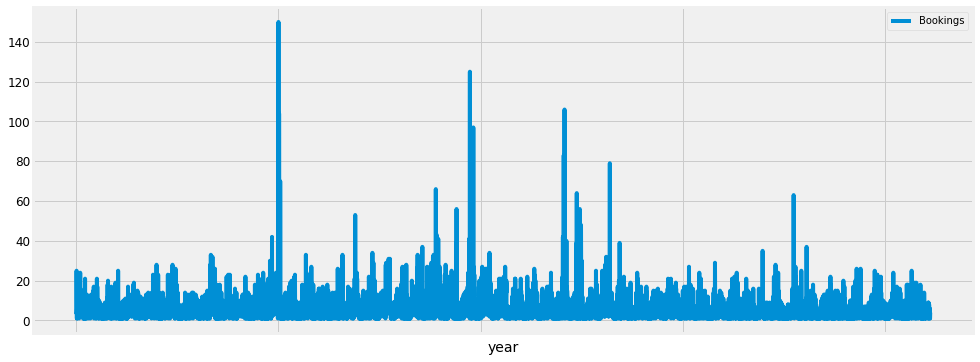

In [34]:
Forecast.plot(figsize=(15, 6))
plt.show()
